In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mydf= pd.read_csv('C:\\Users\\gaura\\Desktop\\practice_wind\\hourly.csv')

In [3]:
mydf

,Time,WindSpeed,Power
0,10/7/2014 1:20,8.22,40.526173
1,10/7/2014 1:30,8.09,38.552540
2,10/7/2014 1:50,7.21,21.313683
3,10/7/2014 2:00,6.75,18.031418
4,10/7/2014 2:10,6.52,16.593281
...,...,...,...
39190,10/6/2015 23:10,7.45,30.580953
39191,10/6/2015 23:20,7.15,28.455153
39192,10/6/2015 23:30,7.27,30.080422
39193,10/6/2015 23:40,8.19,42.483618


In [4]:
mydf['Time']=mydf['Time'].apply(pd.to_datetime)

In [5]:
mydf[['WindSpeed','Power']]=mydf[['WindSpeed','Power']].apply(pd.to_numeric)

In [6]:
mydf['Power']=mydf['Power'] + np.random.normal(0,2,39195)

In [7]:
mydf.index= mydf['Time']
mydf= mydf.drop('Time', axis=1)

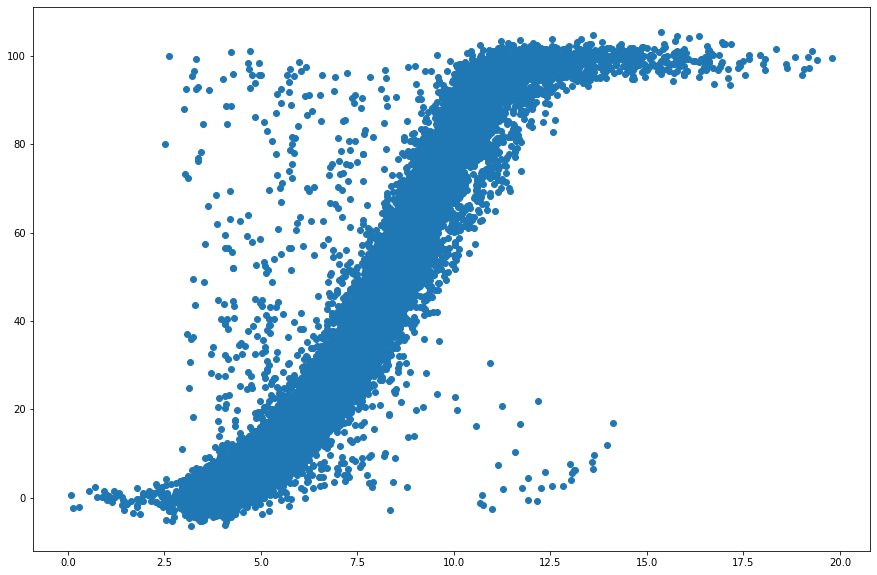

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(mydf['WindSpeed'], mydf['Power'])
plt.show()

In [9]:
X= mydf.values

In [10]:
X

array([[ 8.22      , 40.30760485],
       [ 8.09      , 40.11656304],
       [ 7.21      , 22.68094713],
       ...,
       [ 7.27      , 27.03712665],
       [ 8.19      , 40.40913536],
       [ 7.85      , 40.94740216]])

In [12]:
# determing optimum bandwidth for Mean-shift CLustering

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X=X)
X= scaler.transform(X)


import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

In [45]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=5000, n_jobs=-1)

In [46]:
bandwidth

0.6512436570462834

In [53]:
m = MeanShift(bandwidth=bandwidth, bin_seeding=True,)
m.fit(X)

MeanShift(bandwidth=0.6512436570462834, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [54]:
label=m.labels_

In [55]:
mydf['clusters']= label

In [56]:
mydf.clusters.unique()

array([0, 1, 2], dtype=int64)

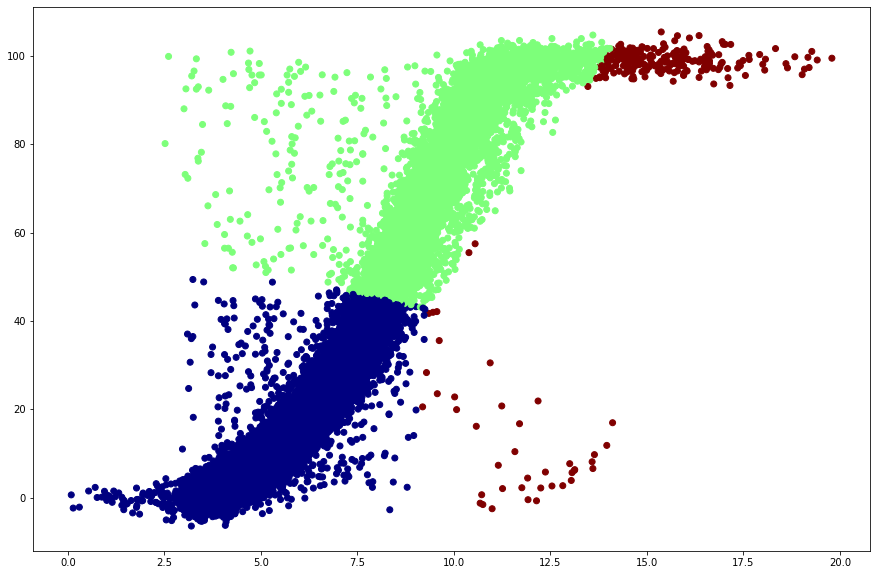

In [57]:
plt.figure(figsize=(15,10))
plt.scatter(mydf['WindSpeed'], mydf['Power'], c=mydf['clusters'], cmap='jet')
plt.show()

we can see mean shift clustering is not ideal for this situation